# Introduction

In the introduction, I will talk about the main problem being solved in this project and the audiences who would care about the problem.

Guangzhou is one of the most popular cities in China. I've lived in Guangzhou for more than twenty years. With rapid economic development, Guangzhou has undergone tremendous changes. More and more new things are emerging such as shops, hospitals, restaurants, and so on. In the past, Coffee shop is not as popular in Guangzhou as that in other metropolis because people prefered tea before. However, the demand of coffee has largely increased nowadays. Therefore, it could be a great business opportunity to open a coffee shop in Guangzhou now. Furthermore, many of my friends get interest in operating a coffee shop in Guangzhou.

Therefore, the problem in my project is:
"which location is suitable for people to open a coffee shop in Guangzhou?"

People who want to open a new coffee shop will care much about this question. A proper location is the basement of the success in operating a coffee shop. Normally, a coffee shop provides a comfortable environment for people to have a drink, study, work, and appointment. Therefore, places next to schools, office buildings, commercial street could be some good choices. Moreover, to reduce competitors, the location is not supposed to contain lots of cafe.

I will use the knowledge I learned in the last several courses and finally choose the best location for coffee shop.

# Data

In order to figure out the problem, the following data are required.

### 1) Geographical coordinates of districts in Guangzhou.

There are 12 districts in Guangzhou. I retrieve the data from
https://gist.github.com/anjia0532/8d278fe50b0c1e9a6cf65f56aadcbad3

### 2) Foursquare location data for Guangzhou¶

I use Foursquare to retrieve the required location data such as shoppingmalls and coffee shops in Guangzhou 

# Methodology

1) Import required libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.0.2p             |       h470a237_1         3.1 MB  conda-forge
    geopy-1.17.0               |             py_0          49 KB  conda-forge
    certifi-2018.11.29         |        py36_1000         145 KB  conda-forge
    conda-4.5.11               |        py36_1000         651 KB  conda-forge
    ca-certificates-2018.11.29 |       ha4d7672_0         143 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.1 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0            conda-forge
    geopy:           

2) Preprocessing districts data in Guangzhou 

In [3]:
Guangzhou_data = \
  {"广州市": {
                "白云区": {
                    "code": "440111",
                    "level": 3,
                    "parentCode": "440000",
                    "name": "白云区",
                    "lon": 113.331306,
                    "lat": 23.294514
                },
                "从化区": {
                    "code": "440117",
                    "level": 3,
                    "parentCode": "440000",
                    "name": "从化区",
                    "lon": 113.698709,
                    "lat": 23.705203
                },
                "越秀区": {
                    "code": "440104",
                    "level": 3,
                    "parentCode": "440000",
                    "name": "越秀区",
                    "lon": 113.287833,
                    "lat": 23.139278
       },
                "荔湾区": {
                    "code": "440103",
                    "level": 3,
                    "parentCode": "440000",
                    "name": "荔湾区",
                    "lon": 113.234423,
                    "lat": 23.093666
                },
                "天河区": {
                    "code": "440106",
                    "level": 3,
                    "parentCode": "440000",
                    "name": "天河区",
                    "lon": 113.385643,
                    "lat": 23.166129
                },
                "番禺区": {
                    "code": "440113",
                    "level": 3,
                    "parentCode": "440000",
                    "name": "番禺区",
                    "lon": 113.4168,
                    "lat": 22.934591
                },
                "花都区": {
                    "code": "440114",
                    "level": 3,
                    "parentCode": "440000",
                    "name": "花都区",
                    "lon": 113.220176,
                    "lat": 23.446661
                },
                "市辖区": {
                    "code": "440101",
                    "level": 3,
                    "parentCode": "440000",
                    "name": "市辖区",
                    "lon": 120.751343,
                    "lat": 36.905533
                },
                "黄埔区": {
                    "code": "440112",
                    "level": 3,
                    "parentCode": "440000",
                    "name": "黄埔区",
                    "lon": 113.492885,
                    "lat": 23.108712
                },
                "海珠区": {
                    "code": "440105",
                    "level": 3,
                    "parentCode": "440000",
                    "name": "海珠区",
                    "lon": 113.333841,
                    "lat": 23.087629
                },
                "增城区": {
                    "code": "440118",
                    "level": 3,
                    "parentCode": "440000",
                    "name": "增城区",
                    "lon": 113.770023,
                    "lat": 23.332026
                },
                "南沙区": {
                    "code": "440115",
                    "level": 3,
                    "parentCode": "440000",
                    "name": "南沙区",
                    "lon": 113.580224,
                    "lat": 22.729894
                }
            }
    }

dists = []
for dist in Guangzhou_data['广州市'].items():
    dists.append({
        'Name': dist[0],
        'Latitude': dist[1]['lat'],
        'Longitude': dist[1]['lon']
        })

df_dists = pd.DataFrame(dists, columns=['Name','Latitude','Longitude'])
df_dists

,Name,Latitude,Longitude
0,白云区,23.294514,113.331306
1,从化区,23.705203,113.698709
2,越秀区,23.139278,113.287833
3,荔湾区,23.093666,113.234423
4,天河区,23.166129,113.385643
5,番禺区,22.934591,113.416800
6,花都区,23.446661,113.220176
7,市辖区,36.905533,120.751343
8,黄埔区,23.108712,113.492885
9,海珠区,23.087629,113.333841


3) Retrieve location data from Foursquare 

In [6]:
CLIENT_ID = 'GNDGULI5VQPZ1KSIZ3ZABHVCJRJVCZIXRZAYPPRNNJAMRHVD' # your Foursquare ID
CLIENT_SECRET = 'WNHQBJNSTVQX1GNSF3THDLBLN4LLGSJWZDW1OSJUBFGVM3OO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API

def getNearbyVenues(names, latitudes, longitudes, radius=30000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [7]:
Guangzhou_venues = getNearbyVenues(names=df_dists['Name'],
                                   latitudes=df_dists['Latitude'],
                                   longitudes=df_dists['Longitude']
                                  )

白云区
从化区
越秀区
荔湾区
天河区
番禺区
花都区
市辖区
黄埔区
海珠区
增城区
南沙区


In [8]:
Guangzhou_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
从化区,5,5,5,5,5,5
南沙区,41,41,41,41,41,41
增城区,6,6,6,6,6,6
天河区,100,100,100,100,100,100
市辖区,4,4,4,4,4,4
海珠区,100,100,100,100,100,100
番禺区,100,100,100,100,100,100
白云区,100,100,100,100,100,100
花都区,9,9,9,9,9,9


4) select required data from the above dataframe

In [9]:
# one hot encoding
Guangzhou_onehot = pd.get_dummies(Guangzhou_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Guangzhou_onehot['Neighborhood'] = Guangzhou_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Guangzhou_onehot.columns[-1]] + list(Guangzhou_onehot.columns[:-1])
Guangzhou_onehot = Guangzhou_onehot[fixed_columns]

Guangzhou_onehot_analysis = Guangzhou_onehot[['Neighborhood', 'Coffee Shop', 'Café', 'Shopping Mall', 'Shopping Plaza']].groupby('Neighborhood').sum()
Guangzhou_onehot_analysis['Coffee Shop & Café'] = Guangzhou_onehot_analysis['Coffee Shop'] + Guangzhou_onehot_analysis['Café']
Guangzhou_onehot_analysis['Shopping Mall & Shopping Plaza'] = Guangzhou_onehot_analysis['Shopping Mall'] + Guangzhou_onehot_analysis['Shopping Plaza']
Guangzhou_onehot_analysis.drop(columns = ['Coffee Shop', 'Café', 'Shopping Mall', 'Shopping Plaza'])


,Coffee Shop & Café,Shopping Mall & Shopping Plaza
Neighborhood,,
从化区,0,0
南沙区,5,2
增城区,0,0
天河区,14,7
市辖区,0,0
海珠区,14,6
番禺区,13,9
白云区,10,5
花都区,0,0


5) Plot the bar chart for analysis

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
Guangzhou_onehot_analysis['Coffee Shop & Café'].head()
Guangzhou_onehot_analysis.rename({'从化区': 'Conghua', '南沙区': 'Nansha', \
                                  '增城区': 'Zengcheng', '天河区': 'Tianhe', \
                                  '市辖区': 'Shixia', '海珠区': 'Haizhu', \
                                  '番禺区': 'Panyu', '白云区': 'Baiyun', \
                                  '花都区': 'Huadu', '荔湾区': 'Liwan', \
                                  '越秀区': 'Yuexiu', '黄埔区': 'Huangpu'}, axis='index', inplace=True)

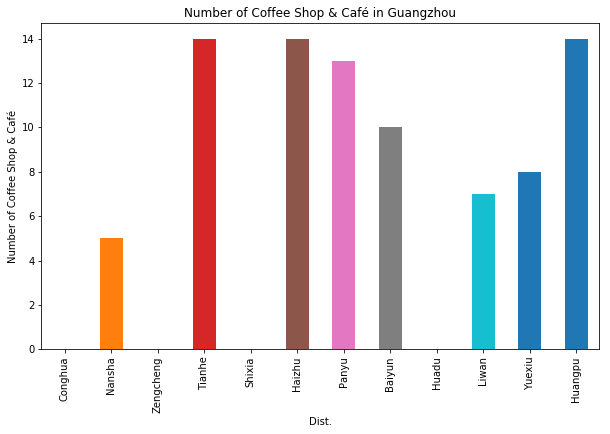

In [12]:
Guangzhou_onehot_analysis['Coffee Shop & Café'].plot(kind='bar', figsize=(10, 6))

plt.xlabel('Dist.') # add to x-label to the plot
plt.ylabel('Number of Coffee Shop & Café') # add y-label to the plot
plt.title('Number of Coffee Shop & Café in Guangzhou') # add title to the plot

plt.show()

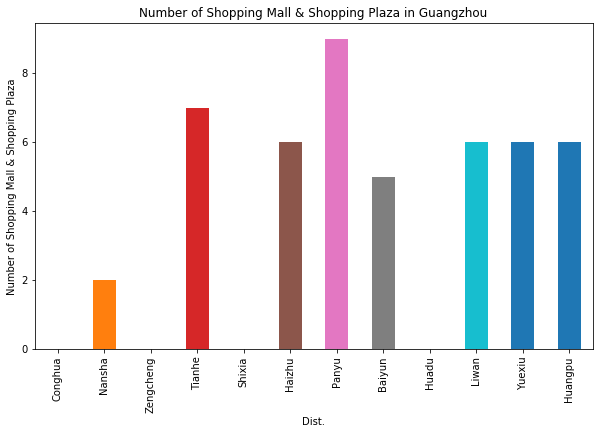

In [13]:
Guangzhou_onehot_analysis['Shopping Mall & Shopping Plaza'].plot(kind='bar', figsize=(10, 6))

plt.xlabel('Dist.') # add to x-label to the plot
plt.ylabel('Number of Shopping Mall & Shopping Plaza') # add y-label to the plot
plt.title('Number of Shopping Mall & Shopping Plaza in Guangzhou') # add title to the plot

plt.show()

# Result

Panyu and Tianhe are two optimal places for opening new coffee shops. Both of them have lots of shopping malls and shopping plaza. Furthermore, as there have already been some coffee shops, which means coffee is more acceptable among people in Panyu and Tianhe than other districts. 

# Discussion

As some places don't have coffee shops, such as Zengcheng and Huadu, it could also be a good opportunity to open coffee shops there. In addition, as I couldn't retrieve detailed information on streets in Panyu and Tianhe, specific location points are not available in this project. Further research could be included if more information is given.

# Conclusion

Tianhe and Panyu are two recommended location for new coffee shops. Specific location points needs further research and data query. 